In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
names1880 = pd.read_csv("data/names/yob1880.txt", names=['name', 'sex', 'births'])

names1880[:10]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [4]:
names1880.groupby('sex').sum()

,births
sex,
F,90993
M,110493


In [6]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = "data/names/yob%d.txt" % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)

names.shape

(1690784, 4)

In [9]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


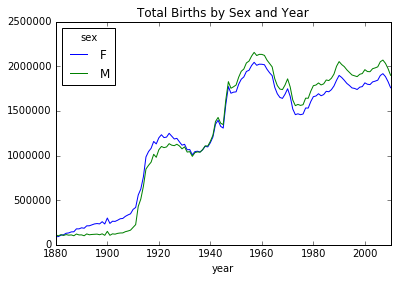

In [11]:
total_births.plot(title='Total Births by Sex and Year')

def add_prop(group):
    # integer division floors
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [12]:
names.shape

(1690784, 5)

In [14]:
# get top 1000 names / year
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

top1000.shape

(261877, 5)

In [17]:
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']

boys.head()

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392


array([<matplotlib.axes._subplots.AxesSubplot object at 0x109b90c10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10742ff50>], dtype=object)

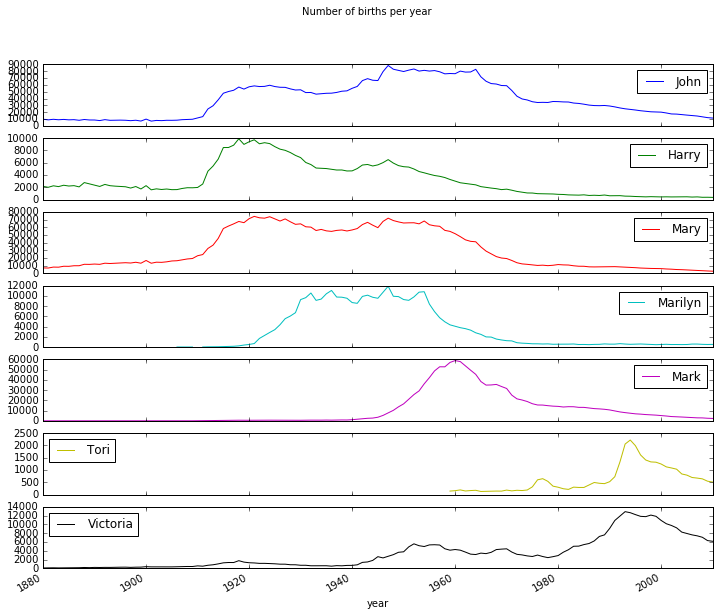

In [19]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

subset = total_births[['John', 'Harry', 'Mary', 'Marilyn', 'Mark', 'Tori', 'Victoria']]

subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

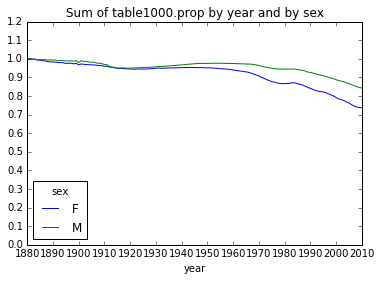

In [21]:
import numpy as np

table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and by sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880,2020,10))